In [1]:
from google.colab import drive
drive.mount('/content/drive')
mydrive ="/content/drive/My Drive/Colab Notebooks/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['landing', 'in', 'montana', 'now', 'to', 'support', 'matt', 'rosendale', 'for', 'u', 's', 'senate', 'maga']
['investigative', 'journalists', 'New York Times', 'times', 'going', 'investigate', 'anonymous', 'letter', 'writer', '?"']
safety american people absolute highest priority heed directions state local officials please prepared careful safe small business optimism soars highest level ever breitbart neverforget september11th 17 years since september 11th departing washington c attend flight 93 september 11th memorial service shanksville pennsylvania melania neverforget rudy giuliani great job mayor nyc period september 11th leadership bravery skill must never forgotten rudy true warrior eric holder could running justice department right would behaving differently loudobbs new strzok page texts reveal media leak strategy foxnews terrible nothing done doj fbi world watching 

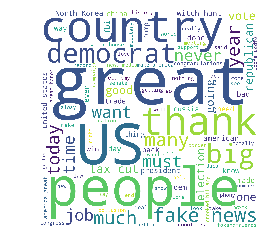

Counter({'great': 754, 'people': 377, 'country': 279, 'news': 265, 'trump': 252, 'big': 242, 'many': 238, 'president': 235, 'fake': 235, 'US': 234, 'america': 208, 'democrats': 206, '...': 203, 'thank': 201, 'much': 189, 'would': 186, 'time': 182, 'today': 178, 'tax': 177, 'good': 173, 'get': 172, 'must': 169, 'trade': 169, 'want': 160, 'border': 144, 'never': 142, 'make': 141, 'american': 139, 'crime': 139, 'fbi': 138, 'back': 138, 'military': 135, 'years': 133, 'going': 130, 'russia': 126, 'house': 124, '....': 123, 'media': 122, 'jobs': 121, 'ever': 120, 'one': 118, 'election': 117, 'new': 116, 'even': 116, 'first': 116, 'job': 114, 'collusion': 112, 'united': 111, 'win': 110, 'bad': 109, 'year': 109, 'hillary': 108, 'campaign': 107, 'states': 107, 'state': 106, 'made': 106, 'security': 106, 'really': 105, 'witch': 105, 'hunt': 105, 'done': 104, 'day': 102, 'obama': 101, 'North Korea': 100, 'n': 100, 'hard': 99, 'deal': 99, 'vote': 99, 'like': 98, 'dems': 98, 'honor': 98, 'working':

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import numpy.random as rand
import string
import csv
import nltk  #nltk stand for natural language toolkit
from nltk import wordpunct_tokenize  
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dates = []
full_text = []
text = []
#extract “date” and “full text” for each tweets. 
with open('/content/drive/My Drive/Colab Notebooks/trump1.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        dates.append(row[0])
        full_text.append(row[3]+row[4]+row[5]+row[6]+row[7]+row[8]+row[9]+row[10])

for i in range(len(dates)):
    dates[i] = dates[i][16:-1]
for i in range(len(full_text)):
    full_text[i] = full_text[i][15:]


#tokenize full text
for i in range (len(full_text)):    
    full_text[i] = wordpunct_tokenize(full_text[i])
    
#remove some strange words and punctuation and URL
pun = ['://','.\\', 'u201d','."','amp','!)?','u2019s','u2019t', 'ud83c']
for i in range (len(full_text)):
    full_text[i] = [w for w in full_text[i] if not w in string.punctuation]
    full_text[i] = [w for w in full_text[i] if not w in pun]
    
    

    for j in range(len(full_text[i])):
        if full_text[i][j][:5] == 'u201c':
            full_text[i][j] = full_text[i][j][5:]
        else:
            full_text[i][j] = full_text[i][j]
        full_text[i][j] = full_text[i][j].lower()

    for j in range(len(full_text[i])):
        if full_text[i][j] == 'https':
            full_text[i] = full_text[i][:j]
            break
        elif full_text[i][j] == 'nhttps':
            full_text[i] = full_text[i][:j]
            break
        elif full_text[i][j] == 'truncated':
            full_text[i] = full_text[i][:j]
            break
        else:
            full_text[i] = full_text[i]
# define some common words

for i in range(len(full_text)):  
    for j in range(len(full_text[i])):
        if full_text[i][j] == "u" and full_text[i][j+1] == "s":
            full_text[i][j] = full_text[i][j].replace("u","US") 
            full_text[i][j+1] = full_text[i][j+1].replace("s","")
        else:
            continue
for i in range(len(full_text)):  
    for j in range(len(full_text[i])):
        if full_text[i][j] == "north" and full_text[i][j+1] == "korea":
            full_text[i][j] = full_text[i][j].replace("north","North Korea") 
            full_text[i][j+1] = full_text[i][j+1].replace("korea","")
        else:
            continue
for i in range(len(full_text)):  
    for j in range(len(full_text[i])):
        if full_text[i][j] == "new" and full_text[i][j+1] == "york" and full_text[i][j+2] == "times":
            full_text[i][j] = full_text[i][j].replace("new","New York Times") 
            full_text[i][j+1] = full_text[i][j+1].replace("york","")
            full_text[i][j+1] = full_text[i][j+1].replace("times","")
        else:
            continue
# remove stop words
for i in range(len(full_text)): 
    while("" in full_text[i]) : 
        full_text[i].remove("")
    while("the" in full_text[i]) : 
        full_text[i].remove("the")
    full_text[i] = [w for w in full_text[i] if not w in stopwords]
        

#put together all tweets 
all_text = []
for i in range (len(full_text)):
    for j in range (len(full_text[i])):
        all_text.append(full_text[i][j])
text_draw = ' '.join(all_text) # convert filterd_tokens return to text
print (text_draw)

#word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words = 100, width = 2000, height = 2000, background_color="white")
wc.generate(text_draw)
plt.axis('off')
plt.imshow(wc)
plt.show()

# count words
from collections import Counter
counter_text = Counter(all_text)
print(counter_text)
fdist = nltk.FreqDist(all_text)
wc.to_file(mydrive+"wordcloud.jpg")
from tabulate import tabulate
# print out the most 70 common word in filtered_hamlet
print (tabulate(fdist.most_common(70), headers=["word","times"]))

In [451]:
all_text=[]
a = []
for i in range(len(dates)):
    a.append(dates[i])
    a.append(full_text[i])
    all_text.append(a)
    a = []
# take north korea for example. You can replace it with any words and count its frequency.
North_Korea = []
k = 0

for i in range (len(all_text)):
    all_text[i][0] = all_text[i][0].split()
for i in range (len(all_text)):
    North_Korea.append(all_text[i][1].count('North Korea'))

all_text = all_text[10:]



date = []
d = 1
date_text = []
for i in range (len(all_text)-1): 
        
    if all_text[i][0][1]== all_text[i+1][0][1] and all_text[i][0][2]== all_text[i+1][0][2] :
        d= d+1
     
    else:
        date.append(d)
        date_text.append(all_text[i][0][0])
        date_text.append(all_text[i][0][1])
        date_text.append(all_text[i][0][2])
        date_text.append(all_text[i][0][5])
        d= 1

date.append(d)
date_text.append(all_text[-1][0][0])
date_text.append(all_text[-1][0][1])
date_text.append(all_text[-1][0][2])
date_text.append(all_text[-1][0][5])

#print (len(date_text))

Date_list = []

for i in range (1468//4):
    Date_list.append(' '.join(date_text[:4] ))
    del date_text[0]
    del date_text[0]
    del date_text[0]
    del date_text[0]
a = 0



#print(len(North_Korea))
#print(len(Date_list))
#print(date)
date_words = []

for l in range(len(date)):
    for i in range(date[l]):
        a = a + North_Korea[i]
    date_words.append(a)
    for i in range (date[l]):
        del North_Korea[0]
    a = 0
print(date_words)   
print(len(date_words))   
print(len(Date_list))
print(Date_list[-5])
print(date_words)
revise_date_words = []
temp = 0
#------------------------------let tweets date = stock price date (text part)----

for i in range( 147):
  if  ((i+1)*(-1)+5)%7 != 0 and ((i+1)*(-1)+6)%7 != 0:  
      revise_date_words.append(date_words[-(i+1)])
  else:
      date_words[-(i+1+1)] = date_words[-(i+1+1)] + date_words[-(i+1)]
revise_date_words.append(0)
print('***')
print(len(revise_date_words))      
for i in range( 24):
  if  ((i+1)*(-1)+4)%7 != 0 and ((i+1)*(-1)+5)%7 != 0:  
      revise_date_words.append(date_words[-(147+i+1)])
  else:
      date_words[-(147+i+1+1)] = date_words[-(147+i+1+1)] + date_words[-(147+i+1)]
  
print('***')
print(len(revise_date_words))
print(revise_date_words[122])
date_words[-(147+26)] = date_words[-(147+26)] + date_words[-(147+25)]
revise_date_words.append(date_words[-(147+26)])

#57, 79, 84, 94,  (104,105中間少1/30/2018),118,  (122, 123中間少2/26,把24/25算到+2/26/2018),146,(資料少-240,-241之間5/6/2018(日)) 187, (資料少6/10/2018 ->只要把9加到11號), 214,257

for i in range( 68):
  if  ((i+1)*(-1)+5)%7 != 0 and ((i+1)*(-1)+6)%7 != 0:
      revise_date_words.append(date_words[-(173+i+1)])
  else:
      date_words[-(173+i+1+1)] = date_words[-(173+i+1+1)] + date_words[-(173+i+1)]
for i in range( 34):
  if  ((i+1)*(-1)+6)%7 != 0 and ((i+1)*(-1)+7)%7 != 0:
      revise_date_words.append(date_words[-(241+i+1)])      
  else:
      date_words[-(241+i+1+1)] = date_words[-(241+i+1+1)] + date_words[-(241+i+1)]
date_words[-(276)] = date_words[-(276)] + date_words[-(275)]

for i in range( 92):
  if  ((i+1)*(-1)+6)%7 != 0 and ((i+1)*(-1)+7)%7 != 0:
      revise_date_words.append(date_words[-(275+i+1)])
  else:
      date_words[-(275+i+1+1)] = date_words[-(275+i+1+1)] + date_words[-(275+i+1)]
revise_date_words[58] = revise_date_words[58] + revise_date_words[57]
revise_date_words[80] = revise_date_words[80] + revise_date_words[79]
revise_date_words[85] = revise_date_words[85] + revise_date_words[84]
revise_date_words[95] = revise_date_words[95] + revise_date_words[94]
revise_date_words[120] = revise_date_words[120] + revise_date_words[119]
revise_date_words[149] = revise_date_words[149] + revise_date_words[148]
revise_date_words[190] = revise_date_words[190] + revise_date_words[189]
revise_date_words[217] = revise_date_words[217] + revise_date_words[216]
revise_date_words[260] = revise_date_words[260] + revise_date_words[259]
del revise_date_words[57] 
del revise_date_words[78]
del revise_date_words[82]
del revise_date_words[91]
del revise_date_words[115]
del revise_date_words[143]
del revise_date_words[183]
del revise_date_words[209]
del revise_date_words[251]
print('%%')
print(len(revise_date_words))
#-----------------------------------------------let tweets date = stock price date(date part)----
revise_Date_list = []
for i in range( 147):
  if  ((i+1)*(-1)+5)%7 != 0 and ((i+1)*(-1)+6)%7 != 0:  
      revise_Date_list.append(Date_list[-(i+1)])
  else:
      continue
for i in range( 24):
  if  ((i+1)*(-1)+4)%7 != 0 and ((i+1)*(-1)+5)%7 != 0:  
      revise_Date_list.append(Date_list[-(147+i+1)])
  else:
      continue


#57, 79, 84, 94,  (104,105中間少1/30/2018),118,  (122, 123中間少2/26,把24/25算到+2/26/2018),146,(資料少-240,-241之間5/6/2018(日)) 187, (資料少6/10/2018 ->只要把9加到11號), 214,257

for i in range( 68):
  if  ((i+1)*(-1)+5)%7 != 0 and ((i+1)*(-1)+6)%7 != 0:
      revise_Date_list.append(Date_list[-(173+i+1)])
  else:
      continue
for i in range( 34):
  if  ((i+1)*(-1)+6)%7 != 0 and ((i+1)*(-1)+7)%7 != 0:
      revise_Date_list.append(Date_list[-(241+i+1)])
  else:
      continue
for i in range( 92):
  if  ((i+1)*(-1)+6)%7 != 0 and ((i+1)*(-1)+7)%7 != 0:
      revise_Date_list.append(Date_list[-(275+i+1)])
  else:
      continue

#print(Date_list[-274])
#print(len(revise_Date_list))

1468
2865
367
[15, 13, 5, 9, 8, 15, 12, 9, 6, 16, 4, 17, 24, 8, 9, 4, 13, 12, 11, 13, 13, 9, 6, 13, 17, 16, 14, 16, 12, 5, 7, 8, 6, 10, 3, 8, 10, 13, 9, 11, 12, 16, 11, 14, 3, 16, 11, 15, 14, 10, 7, 5, 7, 12, 13, 4, 10, 5, 9, 3, 8, 9, 11, 7, 4, 4, 6, 6, 4, 16, 2, 3, 9, 3, 14, 16, 11, 16, 5, 15, 12, 18, 13, 9, 12, 9, 3, 13, 7, 17, 9, 10, 11, 6, 18, 15, 18, 11, 4, 11, 5, 10, 10, 7, 10, 6, 10, 12, 9, 17, 2, 10, 8, 3, 10, 9, 10, 7, 7, 4, 3, 5, 5, 8, 5, 11, 4, 10, 9, 7, 7, 10, 3, 8, 9, 2, 6, 7, 4, 8, 14, 8, 13, 11, 10, 2, 8, 3, 6, 9, 10, 5, 4, 7, 6, 6, 4, 6, 13, 9, 4, 3, 1, 4, 9, 2, 4, 7, 1, 6, 7, 6, 2, 2, 4, 4, 4, 5, 10, 7, 6, 6, 10, 5, 5, 6, 7, 6, 1, 4, 9, 6, 10, 8, 2, 9, 10, 10, 7, 13, 3, 11, 8, 3, 6, 4, 2, 3, 4, 9, 4, 5, 7, 5, 7, 4, 2, 6, 3, 1, 1, 4, 3, 7, 4, 5, 5, 4, 3, 8, 6, 12, 5, 9, 3, 6, 5, 14, 8, 10, 4, 7, 5, 7, 6, 10, 4, 13, 3, 9, 6, 4, 7, 1, 3, 4, 3, 5, 11, 5, 6, 5, 13, 2, 5, 4, 6, 5, 5, 1, 4, 13, 8, 6, 4, 2, 4, 10, 4, 8, 14, 15, 9, 4, 3, 5, 8, 8, 7, 2, 4, 4, 2, 7, 7, 10, 8, 4, 

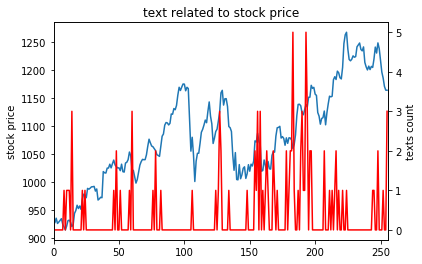

In [459]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand
from pandas_datareader import data as pdr
import fix_yahoo_finance
import fix_yahoo_finance as yf

#plot part

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/stock price/GOOG.csv', sep=',',header=0,index_col=0, parse_dates=True) #讀取csv檔
type(df)

#print(df['Adj Close'])
adj_close = df['Adj Close'] #取資料中 adjusted close price


x = np.array(range(256))
y1 = adj_close
y2 = revise_date_words
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('stock price')
ax1.set_title("text related to stock price")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x, y2, 'r')
ax2.set_xlim([0, 256])
ax2.set_ylabel('texts count')
ax2.set_xlabel('dates')



plt.show()

wc.to_file(mydrive+"plot.jpg")



# New Section